# Supervised Learning for the prediction of Suicide Rates

From the Kaggle web site (https://www.kaggle.com/datasets) download the Suicide Rates
Overview 1985 to 2016 dataset. This dataset has 12 features, and 27820 data points. We
would like to develop a machine learned model to predict, given some feature vectors, if the
outcome would be suicide or not, as a binary dependent variable. The category can be {"low
suicide rate", "high suicide rate"}. Note that, another approach can be generating a numerical
value by solving a regression problem.

A machine learning solution would require to pre-process the dataset and prepare/design our
experimentation.

Load the data set in your model development framework and examine the features. Note that
the Kaggle website also has histograms that you can inspect. However, you might want to look
at the data grouped by some other features. For example, how does the 'number of suicides
/ 100k' histogram look like from country to country?



## Data Exploration

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 72
import numpy as np
import pandas as pd


# Locate and load the data file
df = pd.read_csv('./EP_Dataset_Sui/master.csv')

# Sanity check
print(f'N rows={len(df)}, M columns={len(df.columns)}')
df.columns

N rows=27820, M columns=12


Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [2]:
print(len(df["country-year"].unique()))
print(len(df["suicides/100k pop"]))
print(df.dtypes)
print(df['year'].unique())
print(df['age'].unique())
df

2321
27820
country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object
[1987 1988 1989 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 1985 1986 1990 1991 2012 2013
 2014 2015 2011 2016]
['15-24 years' '35-54 years' '75+ years' '25-34 years' '55-74 years'
 '5-14 years']


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


The following graphs are located inside the images directory which gets created when you run the cells. It manipulates the data in the dataframe, first querying the dataframe based on a particular year, per year, it then pulls arrays based on columns of unique data type, this is required for creating traces for gdp_peryear, gdp_percapita, and hdi. It then sorts the year dataframe based on sexes, basically splitting the dataframe into either male or female. These split data frames are then reconcated with their sex as titles, columns as ages, and rows as countries. This data frame is used to generate the grouped barplots, with the columns being the deviations of the respective barplot denoting certain ages, it plots two grouped bar plots due to the two sexes, and the indexes are countries.

The traces are overlayed on top of the barplot and normalized, so the maximal value reaches the highest bar plot, the normalization occurs per year, so these traces are relative. Blue traces are HDI, Income Per Year is gold, and Income Per Capita is cyan.

In [3]:
# Create a figure with the right layout
# Create a figure with the right layout
import plotly.express as px

def plotit(df, year, income_per_year, hdi_per_year, income_per_capita):
    max_array = np.array(df.max())
    max_val = max_array.max()
    income_per_year = np.array(income_per_year)
    fig = go.Figure(
        layout=go.Layout(
            autosize=True,
            barmode="relative",
            yaxis_showticklabels=False,
            yaxis_showgrid=False,
            yaxis_range=[0, df.groupby(axis=1, level=0).sum().max().max() * 1.5],
           # Secondary y-axis overlayed on the primary one and not visible
            yaxis2=go.layout.YAxis(
                visible=False,
                matches="y",
                overlaying="y",
                anchor="x",
            ),
            font=dict(size=5),
            legend_x=0,
            legend_y=1,
            legend_orientation="h",
            hovermode="x",
            margin=dict(b=0,t=10,l=0,r=10)
        )
    )

    # Define some colors for the product, revenue pairs
    colors = {
        "male": {
            "5-14 years": "#46AF5F",
            "15-24 years": "#260356", 
            "25-34 years": "#E0002F",
            "35-54 years": "#EE7200",
            "55-74 years": "#FFDB42",
            "75+ years": "purple",
        },
        "female": {
            "5-14 years": "#46AF5F",
            "15-24 years": "#260356", 
            "25-34 years": "#E0002F",
            "35-54 years": "#EE7200",
            "55-74 years": "#FFDB42",
            "75+ years": "purple",
        }
    }

    # Add the traces
    for i, t in enumerate(colors):
        for j, col in enumerate(df[t].columns):
            if (df[t][col] == 0).all():
                continue
            fig.add_trace(
                go.Scatter(
                    x=df.index,
                    y=(income_per_year - min(income_per_year))/(max(income_per_year) - min(income_per_year))*max_val,
                    showlegend=False,
                    line_color='gold'
                )
            ),
            fig.add_trace(
                go.Scatter(
                    x=df.index,
                    y=(hdi_per_year - hdi_per_year.min())/(hdi_per_year.max() - hdi_per_year.min())*max_val,
                    showlegend=False,
                    line_color='blue'
                )
            ),
            fig.add_trace(
                go.Scatter(
                    x=df.index,
                    y=(income_per_capita - income_per_capita.min())/(income_per_capita.max() - income_per_capita.min())*max_val,
                    showlegend=False,
                    line_color='cyan'
                )
            )
            fig.add_bar(
                x=df.index,
                y=df[t][col],
                # Set the right yaxis depending on the selected product (from enumerate)
                yaxis=f"y{i + 1}",
                # Offset the bar trace, offset needs to match the width
                # For categorical traces, each category is spaced by 1
                offsetgroup=str(i),
                offset=(i - 1) * 1/3,
                width=1/3,
                legendgroup=t,
                legendgrouptitle_text=t,
                name=col,
                marker_color=colors[t][col],
                marker_line=dict(width=1, color="#333"),
                hovertemplate="%{y}<extra></extra>",
            )

    fig.write_image("./images/"+str(year)+".pdf")

In [4]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go


# Locate and load the data file
dt = pd.read_csv('./EP_Dataset_Sui/master.csv')

year_arr = dt['year'].unique()
year_arr = np.sort(year_arr)
country_arr = dt['country'].unique()


count = 0
for v in year_arr:
    list_income_year=[]
    if count%2==0:
        d_year = dt[dt['year']==v]
        d_income_year = d_year[' gdp_for_year ($) '].unique()
        for i in range(len(d_income_year)):
            int1 = d_income_year[i]
            res = float(int1.replace(',', ''))
            list_income_year.append(res)
        d_income_capita = d_year['gdp_per_capita ($)'].unique()
        d_hdi = d_year['HDI for year'].unique()
        d_hdi[np.isnan(d_hdi)] = 0.005
        df_male = d_year[d_year['sex']=='male']
        df_female = d_year[d_year['sex']=='female']


        # Create dummy data indexed by month and with multi-columns [product, revenue]

        index = country_arr
        ages = d_year['age'].unique()

        new_array_male = df_male
        new_array_male = new_array_male[['country','suicides/100k pop', 'age']]
        new_array_male = new_array_male.pivot(index='country', columns='age', values='suicides/100k pop')

        new_array_female = df_female
        new_array_female = new_array_female[['country','suicides/100k pop', 'age']]
        new_array_female = new_array_female.pivot(index='country', columns='age', values='suicides/100k pop')

        df = pd.concat(
            [
                pd.DataFrame(
                    new_array_male,
                    index=index,
                    columns=d_year['age'].unique()
                ),
                pd.DataFrame(
                    new_array_female,
                    index=index,
                    columns=d_year['age'].unique()
                ),
            ],
            axis=1,
            keys=["male", "female"]
        )

        df = df.dropna()
        plotit(df, v, list_income_year, d_hdi, d_income_capita )
    count = count +1
    continue


/tmp/ipykernel_23408/1061224329.py:68: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_23408/1061224329.py:68: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_23408/1061224329.py:68: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_23408/1061224329.py:68: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_23408/1061224329.py:68: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_23408/1061224329.py:68: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_23408/1061224329.py:68: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_23408/1061224329.py:68: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_23408/1061224329.py:68: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_23408/1061224329.py:68: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_23408/1061224329.py:68: RuntimeWarning:

invalid value 

***Don't mind the warnings, some of the hdi data is impartial and is unavoidable due to the plotting occuring within a for loop.***

The above plots are helpful at looking at data distribution on a year by year basis (skipping every other year), and understanding suicide rate in the context of hdi, gdp, and gdp per capita. For better analysis we need to compare features against each other, to truely understand relations in our feature-space.

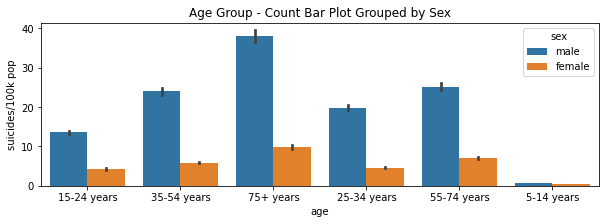

In [5]:
#Age Group - Count Bar Plot Grouped by Gender
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
sns.barplot(x = "age", y = "suicides/100k pop", hue = "sex", data = dt)
plt.title("Age Group - Count Bar Plot Grouped by Sex")
plt.show()

Here we can see that most suicides occur within ages 75+, and 55-74 second which is then closely matched by ages 35-54 years. Suicide rates in these age groups seem high regardless of sex.

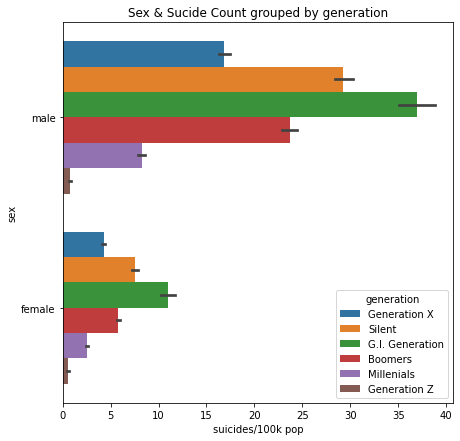

In [6]:
#Gender & Sucide Count grouped by Generation bar plot

plt.figure(figsize=(7,7))
sns.barplot(y="sex", x="suicides/100k pop", hue="generation", data=dt)
plt.title('Sex & Sucide Count grouped by generation')
plt.show()

Here we can see that the hardest effected generation is the GI Generation, then the Silent, then the Boomers. We can also see that males have higher suicide rates than females, all across the board. Keep in mind that while age of a person increases, their Generation is constant throughout the years. So it could be helpful to plot suicide rates as a function of years, with respect to a generation. First though let's see the suicide rate across time.

<Axes: xlabel='year'>

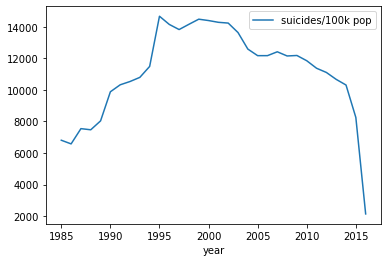

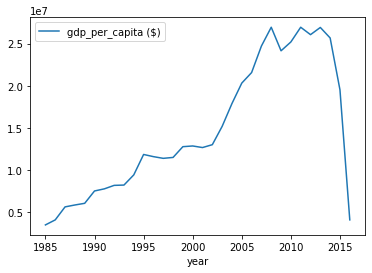

In [7]:
dt[['year','suicides/100k pop']].groupby(['year']).sum().plot()
dt[['year','gdp_per_capita ($)']].groupby(['year']).sum().plot() 

Suicide deaths seem to increase and then take a gradual drop, global gdp doesn't seem to reflect this dynamic, perhaps because most suicides are driven by countries with low gdp, as my population-per-year plots have shown. I'm eliminating the 2015, and 2016 datasets because they are lacking in data-points. Let's actually plot the datapoints across time.

<Axes: xlabel='year'>

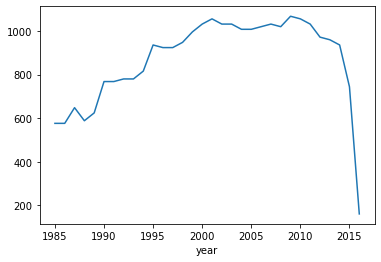

In [8]:
dups_year = dt.pivot_table(columns=['year'], aggfunc='size')
dups_year.plot()

See this is consistent with the sharp drop in global GDP and suicides/100k in the last two years.

In [9]:
sorted_sui_dt = dt.groupby('country')["suicides/100k pop"].mean().sort_values(ascending=False) #take the mean value of suicide rate grouped by country across time
sorted_sui_dt = sorted_sui_dt.to_frame()
sorted_sui_dt = sorted_sui_dt.reset_index().rename(columns={'country': 'country'})
print(sorted_sui_dt)

sorted_gdp_dt = dt.groupby('country')["gdp_per_capita ($)"].mean().sort_values(ascending=False) #take the mean value of suicide rate grouped by country across time
sorted_gdp_dt = sorted_gdp_dt.to_frame()
sorted_gdp_dt = sorted_gdp_dt.reset_index().rename(columns={'country': 'country'})
sorted_gdp_dt


                   country  suicides/100k pop
0                Lithuania          40.415573
1                Sri Lanka          35.295152
2       Russian Federation          34.892377
3                  Hungary          32.761516
4                  Belarus          31.075913
..                     ...                ...
96                    Oman           0.736111
97     Antigua and Barbuda           0.552901
98                 Jamaica           0.521765
99   Saint Kitts and Nevis           0.000000
100               Dominica           0.000000

[101 rows x 2 columns]


,country,gdp_per_capita ($)
0,Luxembourg,68798.387097
1,Qatar,67756.449438
2,Switzerland,62981.761905
3,Norway,57319.600000
4,San Marino,53663.666667
...,...,...
96,Azerbaijan,1005.125000
97,Uzbekistan,976.181818
98,Sri Lanka,904.272727
99,Kiribati,875.909091


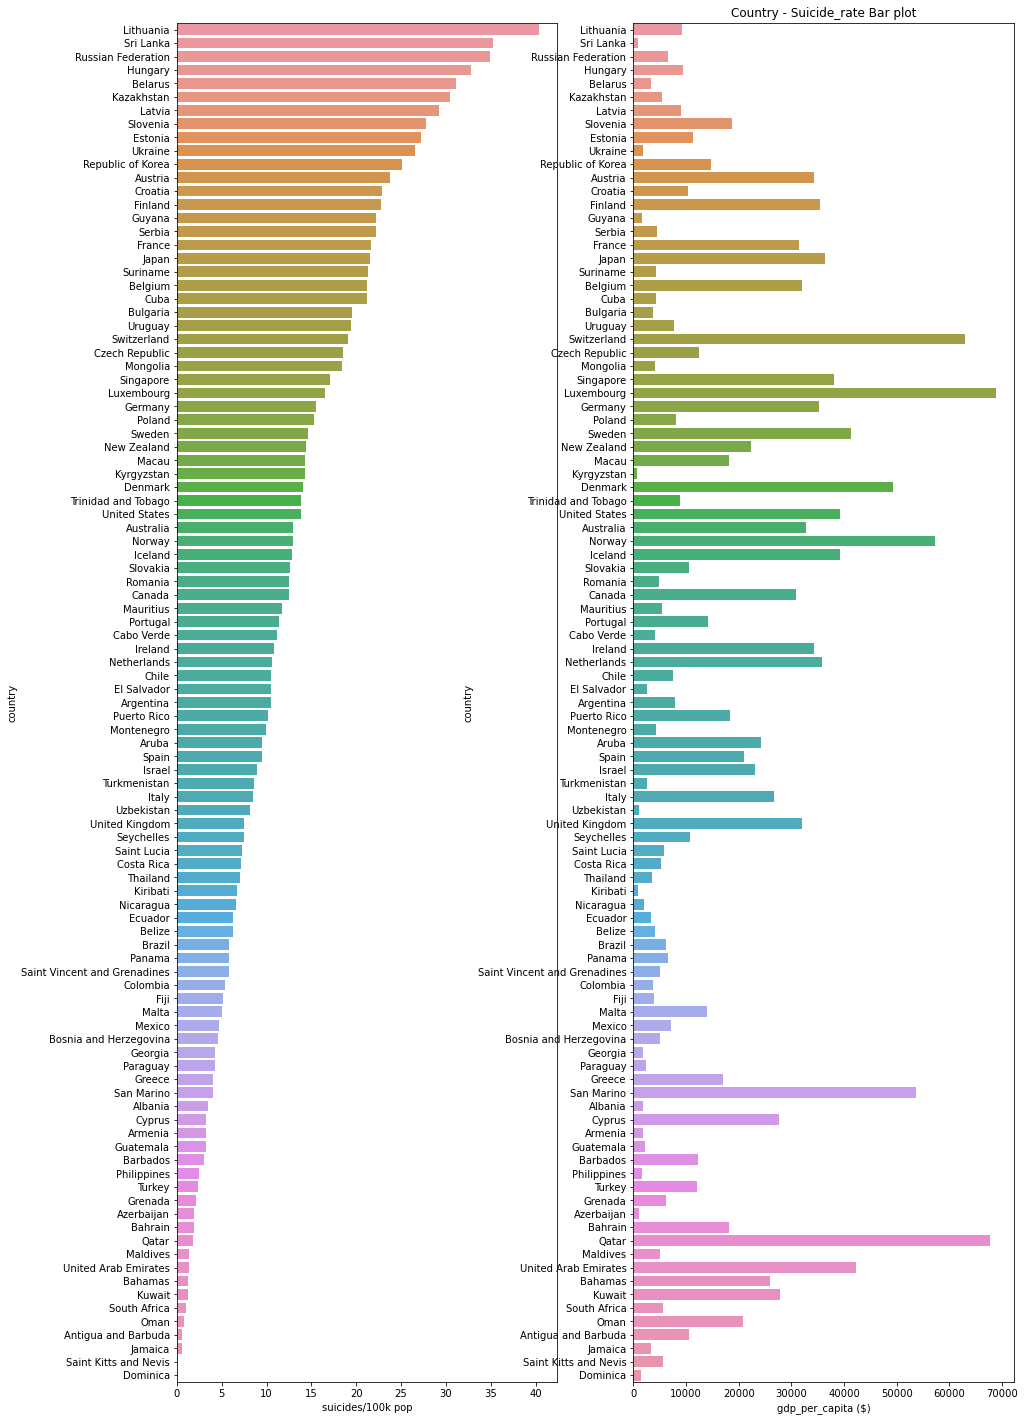

In [10]:
#Country & Suicide_rate Bar plot in descending order

sorted_gdp_dt = sorted_gdp_dt.set_index('country')
sorted_gdp_dt = sorted_gdp_dt.reindex(index=sorted_sui_dt['country'])
sorted_gdp_dt = sorted_gdp_dt.reset_index()


f, axes = plt.subplots(1, 2, figsize=(15,25))
sns.barplot(x = "suicides/100k pop", y = "country", data = sorted_sui_dt, ax=axes[0])
sns.barplot(x = "gdp_per_capita ($)", y = "country", data = sorted_gdp_dt, ax=axes[1])
plt.title('Country - Suicide_rate Bar plot')
plt.show()

Some of the large suicide countries include: Lithuania, Sri Lanka, Russia, Hungary, Belarus, Kazakhsta, 

<Figure size 1440x720 with 0 Axes>

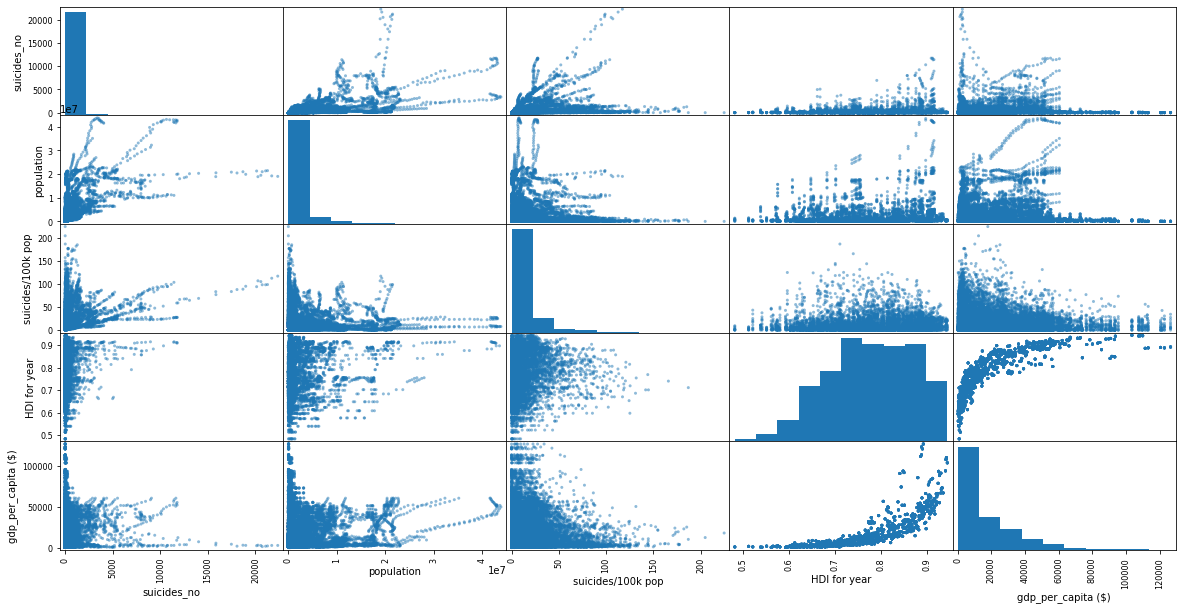

In [11]:
#Scatter matrix for checking outlier
from pandas.plotting import scatter_matrix

plt.figure(figsize=(20,10))
attributes = ['suicides_no', 'population', 'suicides/100k pop','HDI for year','gdp_per_capita ($)']
scatter_matrix(dt[attributes], figsize=(20,10))
plt.show()

It seems like as I'm scanning this scatterplot matrix, suicide numbers highly correlate with gdp of the nation, show an increase in medium sized populations. Unlike Suicide_no, the suicide rate data is far less spurious, it shows an inverse relationship between gdp and suicide rate, a not so good relation with HDI, and most high suicide rates in nations with low population, perhaps due to isolation. 

***What information would be the most important to "machine learn"? Can it be learned?***

After looking at the histogram data, through time, and looking at the top countries distributions, there are a few descriptive phenomenons that can be outlined by this dataset. First men always seem to have higher suicide rates than females, in countries with high suicide rates for men, the women suicide rate accompanies it to a lesser extent. Through time we are scaling multiple factors that are rapidly changing; technology (which could be mapped by the gdp), but also historical events; wars and movements; so location is especially important. From my understanding though despite various wars and movements, it seems that a large portion of landlocked Easter European countries have very high suicide rates, these countries have shown a relatively low GDP, but also various conditions that impact the quality of life in their nations. There are ebs and flows in the dataset especially in south america, and some outliers in the Republic of Korea. Amongst the age groups, older age groups tend to show higher suicide rates, and this metric is not being reflected by the human death index. So in all, I think GDP, population, age, and generation, are pretty good indicators of suicide rates.

***In summary I would describe the big picture of this dataset as learning the phenomenon that poorer countries, with smaller populations, have higher suicide rates that seems to disproportionately target people of older ages***

***How one should set up the problem? Would it be a regression or a classification problem? Any unsupervised approach to see some patterns exist or not?***

It should be a regression problem, because we are quantifying a continuous variable (suicide rates). We are primarily dealing with how much suicide/100k pop due to various conditions such as wealth, age, or location. We are not dealing with a classification problem, where the overall outcome is described via boolean logic (TRUE part of this category, or FALSE not part of this category).

Our dependent variable is the suicide/100k population, this is a continuous variable that we will attempt to describe.
Independent variables include GDP, population, age, year, and generation as pretty good inidication of suicide rates.
I decided to choose suicide rates instead of suicide numbers, because suicide rates is normalized to the population of the respective country and is the more relevant metric.

Utilizing an unsupervised approach first to try and get some information on feature patterns could work, but to be honest, after looking at the numeric data, most feature relations seem spurious, if there is not clear pattern an unsupervised approach will not be informative.

We can utilize supervised learning with this dataset, and the suicide rate as our label to train the model. Before training our data we need to preprocess it, decide on a model to utilize, then randomize our dataset before partitioning it. We will use the model to make predictions of the suicide rates based on these features.

We have a variety of models to pick from that have already been covered in the course, including: k-nearest neighbors regression, SVM, Linear Regression, Decision Tree, and Random Forest.
Doing a comparitive analysis of the performance between these classifiers could be helpful in determining the one with the best performance. We can evaluate the model using the Mean Squared Error.

***What is the dependent variable?***

The dependent variable should be the suicide rate, by nature of the data collected, all other variables like population, age, gdp, hdi, are independent, their values are based on extraneous variables. Suicide rates is understood when compared against these independent variables.

The other suitable dependent variable is suicide_no, I'm choosing to ignore this variable, because it's not normalized to the population. For example, a country like the US with a higher population will have a higher suicide count, then a nation like Lithuania, eventhough Lithuania is dealing with a bigger crisis when taken in consideration to its population. 

## Data Preprocessing and Feature Ranking

***Rank variables with strong correlations between the independent variables and the dependent variable we decided.***

We will need to encode some variables in order to figure out how strong their linear correlation (Pearson correlation) is to suicide_rate. To do this we need to first look at our data types:

In [12]:
dt = pd.read_csv('./EP_Dataset_Sui/master.csv')
dt.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [13]:
#Ill deal with gdp _for year first
dt[" gdp_for_year ($) "] = dt[" gdp_for_year ($) "].str.replace(',', '')
dt[" gdp_for_year ($) "] = pd.to_numeric(dt[" gdp_for_year ($) "])
dt.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)       int64
gdp_per_capita ($)      int64
generation             object
dtype: object

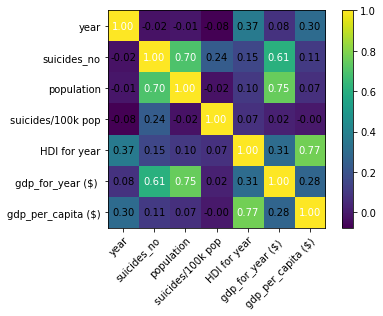

In [14]:
from mlxtend.plotting import heatmap
import numpy as np

dt = pd.read_csv('./EP_Dataset_Sui/master.csv')
dt = dt.convert_dtypes()



dt[" gdp_for_year ($) "] = dt[" gdp_for_year ($) "].str.replace(',', '')
dt[" gdp_for_year ($) "] = pd.to_numeric(dt[" gdp_for_year ($) "])

#print(dt[numeric_cols].dropna().astype(float).dtypes)
#now all relevant columns are converted to numerical data types

numeric_cols = dt.select_dtypes(include=['int', 'float']).columns.tolist()
#Correlation heatmap

#dropping NA values so the correlation plot works
cm = np.corrcoef(dt[numeric_cols].dropna().astype(float).values.T)
hm = heatmap(cm, row_names = numeric_cols, column_names=numeric_cols)
plt.show()

The current features don't show a strong correlation to suicide rate, aside from suicide no. which is synonymous variable anyways. Before moving on, I will preprocess some of my data, mainly, encode features such as sex, age, and generation, so that we can view them. One hot encoding the country feature will introduce a lot of memory utilization, because the feature range is so large. I'm deciding to omit it from my analysis. If there are recommendations for incorporating it please let me know. I decided to encode sex through binary encoding. Age and generation through ordinal encoding, as the variables can be interpreted as ordinal.

In [15]:
str_cols = ["sex", "age", "generation"]

dt['sex'] = dt['sex'].map({'female':0,'male':1})


dt['age'] = dt['age'].map({
        '5-14 years':0,'15-24 years':1,'25-34 years':2,
        '35-54 years':3,'55-74 years':4,'75+ years':5})
dt['generation'] = dt['generation'].map({
        'Generation Z':0,'Millenials':1,'Generation X':2,
        'Boomers':3,'Silent':4,'G.I. Generation':5})

dt



,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,1,1,21,312900,6.71,Albania1987,<NA>,2156624900,796,2
1,Albania,1987,1,3,16,308000,5.19,Albania1987,<NA>,2156624900,796,4
2,Albania,1987,0,1,14,289700,4.83,Albania1987,<NA>,2156624900,796,2
3,Albania,1987,1,5,1,21800,4.59,Albania1987,<NA>,2156624900,796,5
4,Albania,1987,1,2,9,274300,3.28,Albania1987,<NA>,2156624900,796,3
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,0,3,107,3620833,2.96,Uzbekistan2014,0.675,63067077179,2309,2
27816,Uzbekistan,2014,0,5,9,348465,2.58,Uzbekistan2014,0.675,63067077179,2309,4
27817,Uzbekistan,2014,1,0,60,2762158,2.17,Uzbekistan2014,0.675,63067077179,2309,0
27818,Uzbekistan,2014,0,0,44,2631600,1.67,Uzbekistan2014,0.675,63067077179,2309,0


In [16]:
#As you can see HDI has less entries then all other data points, with a significant portion of missing values. I'll replace HDI with previous values from the last year,
#or the year that follows.

#we will also drop country-year as it's just a redundant feature

#  fill ''HDI for year' nulls with previous values
dt['HDI for year'].fillna(method='ffill', inplace=True)

#  drop remaining''HDI for year' nulls
dt.drop(dt[dt['HDI for year'].isnull()].index, inplace = True)
dt.drop(['country-year'], axis=1, inplace = True)

dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27748 entries, 72 to 27819
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27748 non-null  string 
 1   year                27748 non-null  Int64  
 2   sex                 27748 non-null  int64  
 3   age                 27748 non-null  int64  
 4   suicides_no         27748 non-null  Int64  
 5   population          27748 non-null  Int64  
 6   suicides/100k pop   27748 non-null  Float64
 7   HDI for year        27748 non-null  Float64
 8    gdp_for_year ($)   27748 non-null  int64  
 9   gdp_per_capita ($)  27748 non-null  Int64  
 10  generation          27748 non-null  int64  
dtypes: Float64(2), Int64(4), int64(4), string(1)
memory usage: 2.5 MB


In [17]:
print('\nDUPLICATE COUNT:  ', dt.duplicated().sum())
print('\nNA COUNT:  ', dt.isna().sum())



DUPLICATE COUNT:   0

NA COUNT:   country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64


Now I will standardize the dataset so that its widely applicable to ML algorithms such as SVM, using the Robust Scaler, I will only normalize the year column.

In [18]:
#Scaling the numerical data columns with RobustScalar

numerical = ['suicides_no', 'population', 'suicides/100k pop', 
              ' gdp_for_year ($) ','gdp_per_capita ($)']

from sklearn.preprocessing import RobustScaler

rc = RobustScaler()
dt[numerical] = rc.fit_transform(dt[numerical])

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
dt[['year']] = min_max_scaler.fit_transform(dt[['year']])
dt

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
72,Albania,0.322581,1,2,-0.093023,-0.143396,-0.027937,0.619,-0.181932,-0.401026,2
73,Albania,0.322581,1,4,-0.124031,-0.182798,-0.060952,0.619,-0.181932,-0.401026,4
74,Albania,0.322581,0,5,-0.178295,-0.281266,-0.071111,0.619,-0.181932,-0.401026,5
75,Albania,0.322581,0,1,-0.093023,-0.107081,-0.090794,0.619,-0.181932,-0.401026,2
76,Albania,0.322581,1,1,-0.108527,-0.137439,-0.092698,0.619,-0.181932,-0.401026,2
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,0.935484,0,3,0.635659,2.288117,-0.194286,0.675,0.059153,-0.332260,2
27816,Uzbekistan,0.935484,0,5,-0.124031,-0.060455,-0.218413,0.675,0.059153,-0.332260,4
27817,Uzbekistan,0.935484,1,0,0.271318,1.671848,-0.244444,0.675,0.059153,-0.332260,0
27818,Uzbekistan,0.935484,0,0,0.147287,1.578146,-0.276190,0.675,0.059153,-0.332260,0


/tmp/ipykernel_23408/1721655987.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: title={'center': 'Suicide Correlation'}>

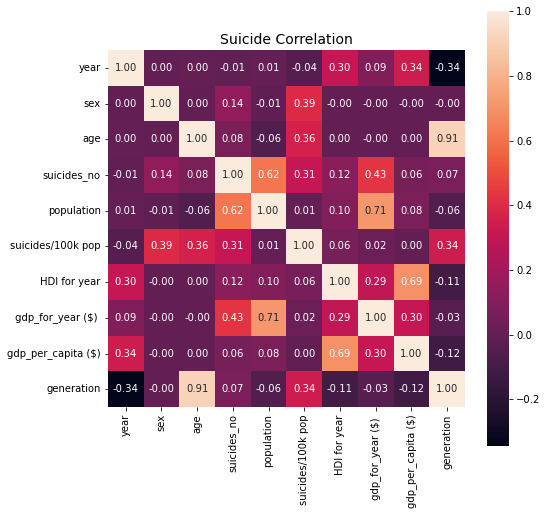

In [19]:
#  Correlations - OVERALL
dataCorr = dt.corr()

#  print correlation
dataCorr['suicides/100k pop'].sort_values(ascending=False)

#  plot heatmap
plt.figure(figsize=(8,8))
plt.title('Suicide Correlation', fontsize=14)
sns.heatmap(dataCorr, annot=True, fmt='.2f', square=True)

***Sex, age and generation seem to be the most correlated features to suicide rate in order.*** Moving on we should use these features for machine learning.

I'll then Encode the countries to a region, and do one-hot encoding on that region. I've debated if this is a good idea or not, and honestly I went through a lot of online sources to answer this question. Suicide rate may be affected by location, and the only way to figure that out is to transform country into an encoded variable; that would be impossible to do because there are so many countries. To limit that, I will use continents instead of countries lowering the dimensionality of the dataset.

***5. [20 pts] Pre-process the dataset and list the major features you want to use. Note that not
all features are crucial. For example, country-year variable is a derived feature and for a
classifier it would not be necessary to include the year, the country and the country-year
together. In fact, one must avoid adding a derived feature and the original at the same time.
List the independent features you want to use.***

The dataset has already been preprocessed, data types have been converted to numerical, and features such as age and generation have been encoded using ordinal encoding, while sex is encoded using binary encoding. The final feature that I think may be important is the country, the number of categories inside country is extremely large, so one-hot encoding this categorical feature would be computationally extensive and uninterpretable. Instead, I will map each country to a continent, then encode the continents using one-hot encoding.

In [20]:
import pycountry_convert as pc

def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name


dt_comp = dt
country_AR = dt_comp['country'].unique() 
for country in country_AR:
    if country == 'Republic of Korea':
        country_f = 'South Korea'
        continent = country_to_continent(country_f)
        dt_comp = dt_comp.replace(country, continent)
        continue
    if country == 'Saint Vincent and Grenadines':
        country_f = 'Barbados'
        continent = country_to_continent(country_f)
        dt_comp = dt_comp.replace(country, continent)
        continue
    continent = country_to_continent(country)
    dt_comp = dt_comp.replace(country, continent)

dt_comp

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
72,Europe,0.322581,1,2,-0.093023,-0.143396,-0.027937,0.619,-0.181932,-0.401026,2
73,Europe,0.322581,1,4,-0.124031,-0.182798,-0.060952,0.619,-0.181932,-0.401026,4
74,Europe,0.322581,0,5,-0.178295,-0.281266,-0.071111,0.619,-0.181932,-0.401026,5
75,Europe,0.322581,0,1,-0.093023,-0.107081,-0.090794,0.619,-0.181932,-0.401026,2
76,Europe,0.322581,1,1,-0.108527,-0.137439,-0.092698,0.619,-0.181932,-0.401026,2
...,...,...,...,...,...,...,...,...,...,...,...
27815,Asia,0.935484,0,3,0.635659,2.288117,-0.194286,0.675,0.059153,-0.332260,2
27816,Asia,0.935484,0,5,-0.124031,-0.060455,-0.218413,0.675,0.059153,-0.332260,4
27817,Asia,0.935484,1,0,0.271318,1.671848,-0.244444,0.675,0.059153,-0.332260,0
27818,Asia,0.935484,0,0,0.147287,1.578146,-0.276190,0.675,0.059153,-0.332260,0


Now I will use one-hot encoding

In [21]:
dt_comp = pd.get_dummies(dt_comp, columns = ['country'])
dt_comp

,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,country_Africa,country_Asia,country_Europe,country_North America,country_Oceania,country_South America
72,0.322581,1,2,-0.093023,-0.143396,-0.027937,0.619,-0.181932,-0.401026,2,0,0,1,0,0,0
73,0.322581,1,4,-0.124031,-0.182798,-0.060952,0.619,-0.181932,-0.401026,4,0,0,1,0,0,0
74,0.322581,0,5,-0.178295,-0.281266,-0.071111,0.619,-0.181932,-0.401026,5,0,0,1,0,0,0
75,0.322581,0,1,-0.093023,-0.107081,-0.090794,0.619,-0.181932,-0.401026,2,0,0,1,0,0,0
76,0.322581,1,1,-0.108527,-0.137439,-0.092698,0.619,-0.181932,-0.401026,2,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,0.935484,0,3,0.635659,2.288117,-0.194286,0.675,0.059153,-0.332260,2,0,1,0,0,0,0
27816,0.935484,0,5,-0.124031,-0.060455,-0.218413,0.675,0.059153,-0.332260,4,0,1,0,0,0,0
27817,0.935484,1,0,0.271318,1.671848,-0.244444,0.675,0.059153,-0.332260,0,0,1,0,0,0,0
27818,0.935484,0,0,0.147287,1.578146,-0.276190,0.675,0.059153,-0.332260,0,0,1,0,0,0,0


Last thing I will do is drop suicides_no column, and move my suicides rate to the last column of my dataframe.

In [22]:
dt_comp.drop(['suicides_no'], axis=1, inplace = True)
dt_comp = dt_comp[['year', 'sex', 'age', 'population', 'HDI for year', ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation', 'country_Africa', 
                   'country_Asia', 'country_Europe', 'country_North America', 'country_Oceania', 'country_South America','suicides/100k pop']]
dt_comp

,year,sex,age,population,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,country_Africa,country_Asia,country_Europe,country_North America,country_Oceania,country_South America,suicides/100k pop
72,0.322581,1,2,-0.143396,0.619,-0.181932,-0.401026,2,0,0,1,0,0,0,-0.027937
73,0.322581,1,4,-0.182798,0.619,-0.181932,-0.401026,4,0,0,1,0,0,0,-0.060952
74,0.322581,0,5,-0.281266,0.619,-0.181932,-0.401026,5,0,0,1,0,0,0,-0.071111
75,0.322581,0,1,-0.107081,0.619,-0.181932,-0.401026,2,0,0,1,0,0,0,-0.090794
76,0.322581,1,1,-0.137439,0.619,-0.181932,-0.401026,2,0,0,1,0,0,0,-0.092698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,0.935484,0,3,2.288117,0.675,0.059153,-0.332260,2,0,1,0,0,0,0,-0.194286
27816,0.935484,0,5,-0.060455,0.675,0.059153,-0.332260,4,0,1,0,0,0,0,-0.218413
27817,0.935484,1,0,1.671848,0.675,0.059153,-0.332260,0,0,1,0,0,0,0,-0.244444
27818,0.935484,0,0,1.578146,0.675,0.059153,-0.332260,0,0,1,0,0,0,0,-0.276190


***Devise a classification problem and present a prototype model. We will continue to this problem in the following notebooks.***

Well I think the dataset here is hinting at a regression problem, our dependent variable is a continuous variable, and we should explore regression classifiers such as SVM, Linear Regression, Decision Tree, and Random Forest.

For the sake of the prompt, if one would turn this problem into a classification problem, to do this we need to turn a continuous variable into a categorical variable. One nice and efficient way to do this is to section the suicide rate into percentiles. As in, the suicide rates of this country are in the top 10% percentile or not. We can do this using the pandas.cut method, and bin the rates into different percentiles. This will result in some information loss, and I'm unsure what the advantage is.

Then we can utilize nominal encoding of the categories, and use this data as our ground truth. We should split the dataset into a training, validation, and testing dataset, and we should plan on utilizing multiple classifiers. With this data I would recommend utilizing Imbalanced classification, since the number of categories with high suicide rate (say top 10%, is few and far between) compared to the other categories. This way common evaluation metrics like TPR and FPR would be useful metrics to evaluate performance, so we should use precision, recall, and F1 metrics over accuracy. In terms of a good model to use for imbalanced datasets models, I would select KNN algorithm, but other algorithms like Decision Trees, and Random Forest may work as well. The important thing to do is to perform validation, before testing on the test dataset. Again, we should choose the most significant features that were identified, age, sex, and generation, as well as the country encoded features.